# California Housing Prices Prediction 

This data contains information from the 1990 California census. 

In [1]:
# Importing the libraries :

# Explore the Data :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Data preprocessing Libraries :
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Regression Libraries :
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

### Import the DataSet (csv file ):

In [2]:
# read the data :
df_house = pd.read_csv('../input/housing.csv')

In [3]:
df_house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
List_of_Labels = list(df_house['median_house_value'].head(10))
List_of_Labels

[452600.0,
 358500.0,
 352100.0,
 341300.0,
 342200.0,
 269700.0,
 299200.0,
 241400.0,
 226700.0,
 261100.0]

Note :                          
1.It is a 'Regression' problem because the label 'median_house_value' is continuous .           
2.We will apply all types of regression and predict the median_house_value .               
3.We will compare which type of regression is best for this prediction .

### Sample of our Data Set :

In [5]:
df_house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df_house.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Checking for NaN value :

In [8]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

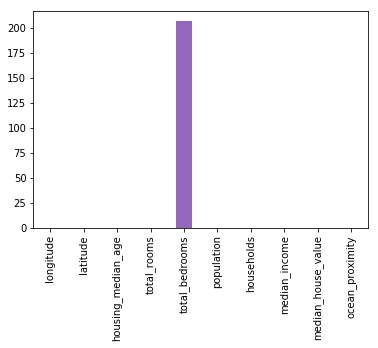

In [9]:
df_house.isnull().sum().plot(kind = 'bar')

You can see there are NaN values in coulmn named 'total_bedrooms' so we have to deal with that 

In [10]:
# filling zero on the place of NaN values in the data set 
df_house['total_bedrooms'].fillna(0,inplace = True)

In [11]:
df_house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Exploratory Data Analysis (EDA)

[]

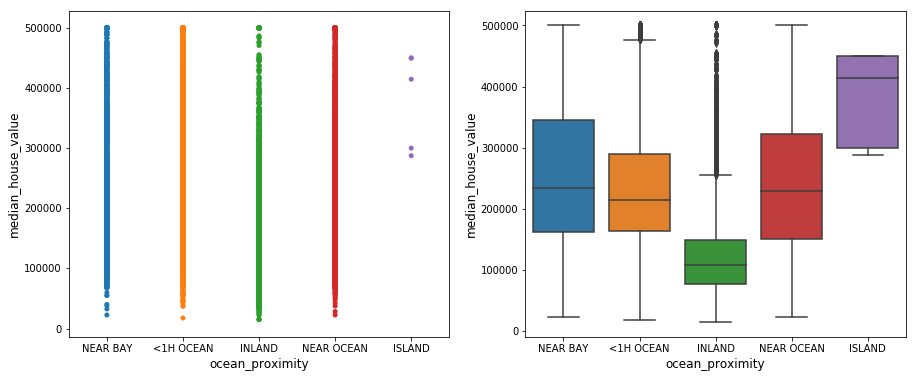

In [12]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace = .25)
plt.subplot(1,2,1)
plt.xlabel('ocean_proximity',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
sns.stripplot(data=df_house,x='ocean_proximity',y='median_house_value',)
plt.subplot(1,2,2)
plt.xlabel('ocean_proximity',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
sns.boxplot(data=df_house,x='ocean_proximity',y='median_house_value')
plt.plot()

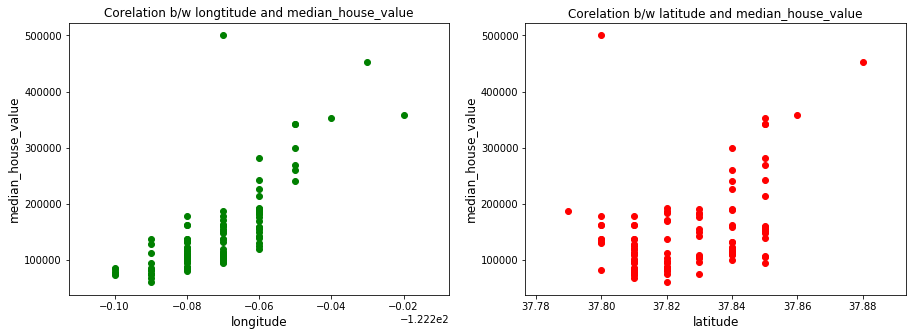

In [13]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace = .25)
plt.subplot(1,2,1)
plt.title('Corelation b/w longtitude and median_house_value')
plt.xlabel('longitude',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
plt.scatter(df_house['longitude'].head(100),df_house['median_house_value'].head(100),color='g')
plt.subplot(1,2,2)
plt.title('Corelation b/w latitude and median_house_value')
plt.xlabel('latitude',fontsize=12)
plt.ylabel('median_house_value',fontsize=12)
plt.scatter(df_house['latitude'].head(100),df_house['median_house_value'].head(100),color='r')

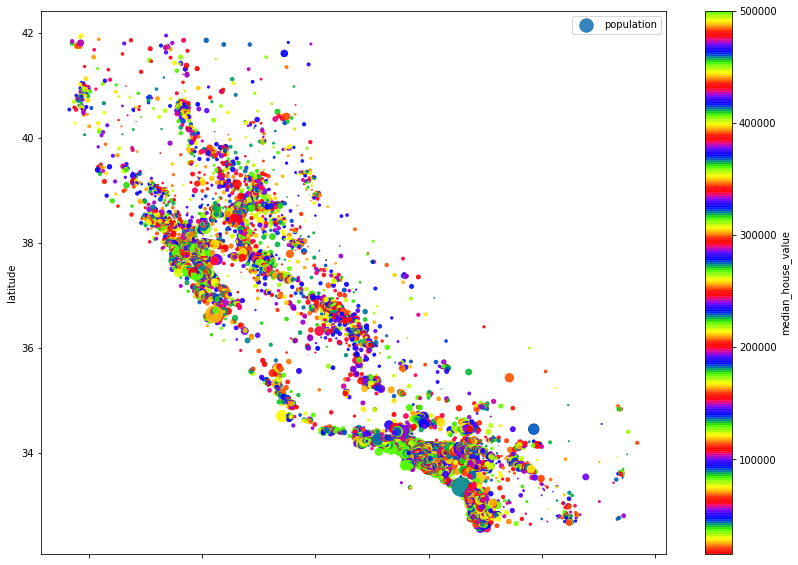

In [14]:
df_house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9, 
    s=df_house['population']/100, label='population', figsize=(14,10), 
    c='median_house_value', cmap=plt.get_cmap('prism'), colorbar=True)

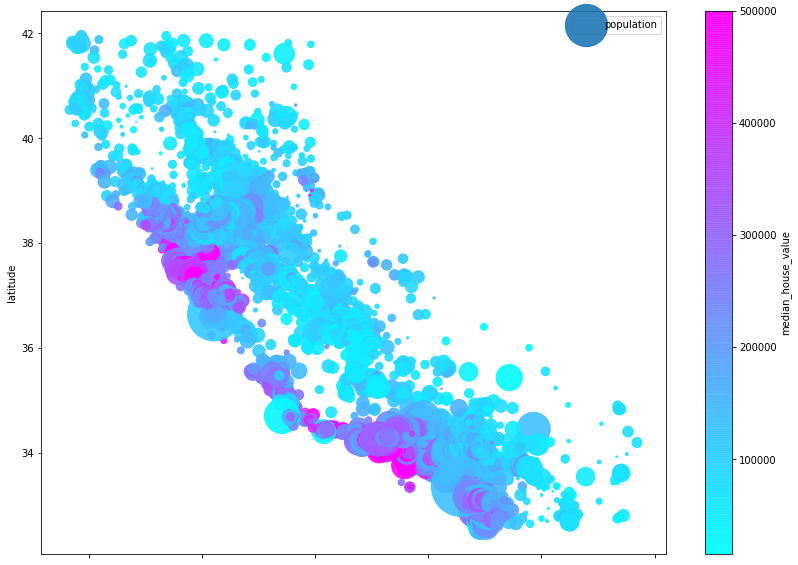

In [15]:
df_house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.9, 
    s=df_house['population']/10, label='population', figsize=(14,10), 
    c='median_house_value', cmap=plt.get_cmap('cool'), colorbar=True)

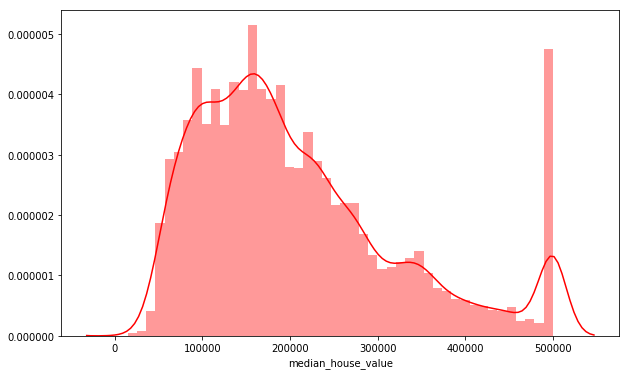

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df_house['median_house_value'],color='red')
plt.show()

In [17]:
df_house[df_house['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

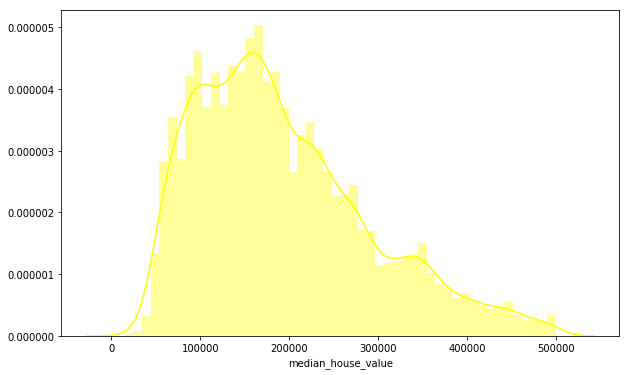

In [18]:
df_house=df_house.loc[df_house['median_house_value']<500001,:]
df_house=df_house[df_house['population']<25000]
plt.figure(figsize=(10,6))
sns.distplot(df_house['median_house_value'],color='yellow')
plt.show()

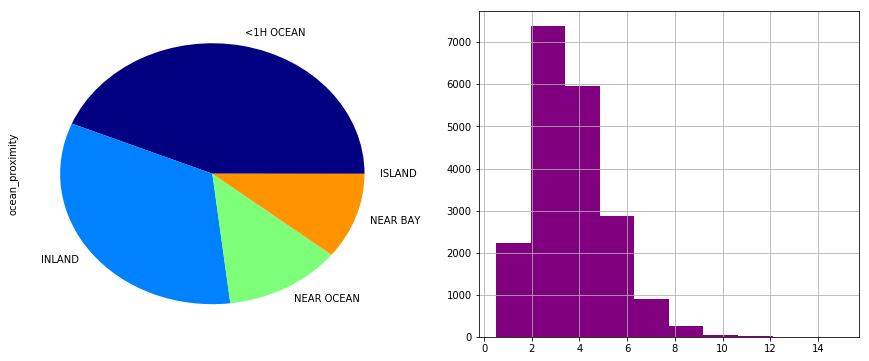

In [19]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace = .25)
plt.subplot(1,2,1)
df_house['ocean_proximity'].value_counts().plot(kind = 'pie',colormap = 'jet')
plt.subplot(1,2,2)
df_house['median_income'].hist(color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76d13237f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f76d1076588>]], dtype=object)

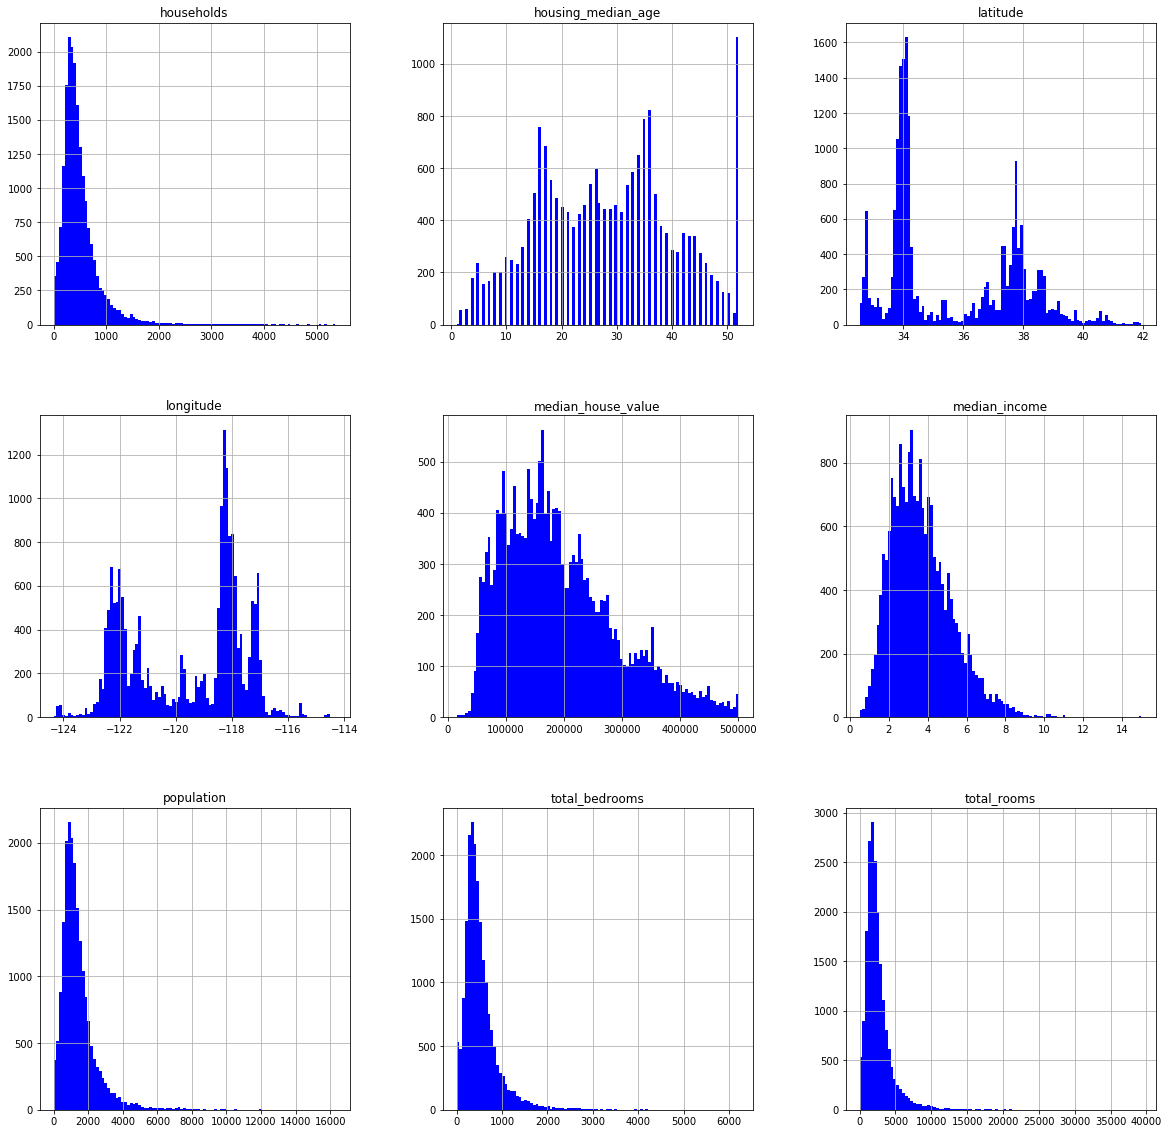

In [20]:
df_house.hist(bins=100, figsize=(20,20) , color = 'b')

### Corelation Matrics 

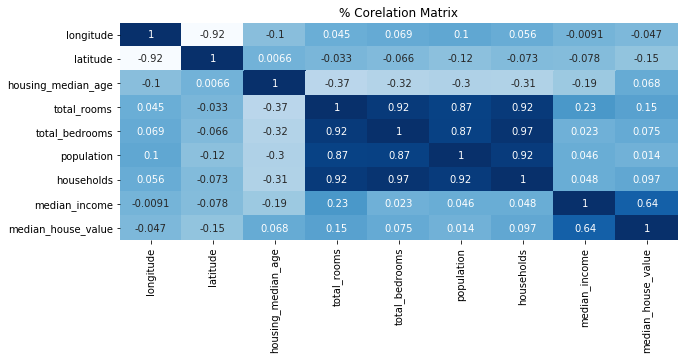

In [21]:
plt.figure(figsize=(10,4))
sns.heatmap(cbar=False,annot=True,data=df_house.corr(),cmap='Blues')
plt.title('% Corelation Matrix')
plt.show()

# Data Preprocessing :

In [22]:
x=df_house.iloc[:,:-1].values
print(x)

[[ -1.22230000e+02   3.78800000e+01   4.10000000e+01 ...,   1.26000000e+02
    8.32520000e+00   4.52600000e+05]
 [ -1.22220000e+02   3.78600000e+01   2.10000000e+01 ...,   1.13800000e+03
    8.30140000e+00   3.58500000e+05]
 [ -1.22240000e+02   3.78500000e+01   5.20000000e+01 ...,   1.77000000e+02
    7.25740000e+00   3.52100000e+05]
 ..., 
 [ -1.21220000e+02   3.94300000e+01   1.70000000e+01 ...,   4.33000000e+02
    1.70000000e+00   9.23000000e+04]
 [ -1.21320000e+02   3.94300000e+01   1.80000000e+01 ...,   3.49000000e+02
    1.86720000e+00   8.47000000e+04]
 [ -1.21240000e+02   3.93700000e+01   1.60000000e+01 ...,   5.30000000e+02
    2.38860000e+00   8.94000000e+04]]


In [23]:
y=df_house['median_house_value'].values
print(y)

[ 452600.  358500.  352100. ...,   92300.   84700.   89400.]


### Encoding the Categorical values :

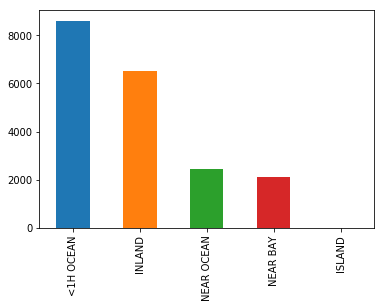

In [24]:
df_house['ocean_proximity'].value_counts().plot(kind = 'bar')

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:, 8] = labelencoder.fit_transform(x[:, 8])
onehotencoder = OneHotEncoder(categorical_features = [8])
x = onehotencoder.fit_transform(x).toarray()

### Spliting the data set into train and test set :

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
print('xtrain :')
print(xtrain)
print('xtest :')
print(xtest)

xtrain :
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   9.83000000e+02
    6.55000000e+02   3.71740000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   8.90000000e+02
    3.75000000e+02   3.42650000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.49200000e+03
    4.91000000e+02   4.09450000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.11500000e+03
    4.78000000e+02   1.53690000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.48000000e+02
    2.45000000e+02   3.57140000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   9.71000000e+02
    3.89000000e+02   2.60530000e+00]]
xtest :
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.50000000e+02
    2.00000000e+01   2.62500000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.20500000e+03
    3.90000000e+02   4.21090000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.46000000e+02
    

In [28]:
print('ytrain :')
print(ytrain)
print('ytest :')
print(ytest)

ytrain :
[ 275000.   85000.  135700. ...,  141300.  300000.   99200.]
ytest :
[ 250000.  171200.   97300. ...,  325000.  163100.   71700.]


### Linear Regression :

In [29]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# predict the value of dependent variable y
ypred = linear_regressor.predict(xtest)
ypred

array([ 250000.00000816,  171200.00000116,   97299.99999904, ...,
        324999.99999753,  163100.00001747,   71699.99999929])

In [31]:
from sklearn.metrics import mean_squared_error
predictions = linear_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)

rmse value is :  32996.6069701


In [32]:
lin_reg_score = linear_regressor.score(xtest,ytest)
print('r squared value is : ',lin_reg_score )

r squared value is :  0.8874974176


### Decision Tree Regression :

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [34]:
y_pred = tree_regressor.predict(xtest)
y_pred

array([ 425000.,  171100.,  102600., ...,  142500.,  158700.,   71300.])

In [35]:
from sklearn.metrics import mean_squared_error
predictions = tree_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)

rmse value is :  56768.1560561


In [36]:
tree_score = tree_regressor.score(xtest,ytest)
print('r squared value is : ',tree_score )

r squared value is :  0.667008230565


### Random forest Regression :

In [37]:
from sklearn.ensemble import RandomForestRegressor
rn_forest_regressor = RandomForestRegressor(n_estimators=50,random_state=0)
rn_forest_regressor.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
rn_forest_regressor.predict(xtest)

array([ 330222.  ,  183892.  ,  133643.98, ...,  147850.  ,  157198.  ,
         80862.  ])

In [39]:
from sklearn.metrics import mean_squared_error
predictions = rn_forest_regressor.predict(xtest)
lin_mse = mean_squared_error(ytest,predictions)
lin_rmse = np.sqrt(lin_mse)
print('rmse value is : ',lin_rmse)

rmse value is :  44869.282739


In [40]:
rsq_rn_forest = rn_forest_regressor.score(xtest,ytest)
print('r squared value is : ',rsq_rn_forest )

r squared value is :  0.791971815909


We can see that by the use of Random forest regression we are getting r squared value is 0.79 .

Hence  ' RANDOM FOREST ' could be the best model because of low mean squred error and a high r squared value .